<a href="https://colab.research.google.com/github/Ru1chi/sample/blob/main/model_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle
import seaborn as sns



In [2]:
# Load the dataset
df = pd.read_excel('/content/recipees.xlsx')



df



,recipe_name,ingredients,calories,protein,carbs,fat,price($)
0,Caesar Salad,"Romaine Lettuce, Croutons, Parmesan",180,7,8,12,4.5
1,Margarita Pizza,"Dough, Tomato Sauce, Mozzarella",300,15,40,10,8.0
2,Vegetable Lasagna,"Zucchini, Tomato Sauce, Ricotta",350,20,45,15,6.5
3,BBQ Chicken Wings,"Chicken, BBQ Sauce, Spices",400,25,10,20,9.0
4,Fruit Smoothie,"Banana, Strawberry, Yogurt",150,4,30,2,3.0
...,...,...,...,...,...,...,...
95,Mango Sorbet,"Mango, Sugar, Water",150,1,35,0,3.0
96,Peanut Butter Sandwich,"Peanut Butter, Bread, Honey",300,10,30,15,2.5
97,Tofu Salad,"Tofu, Lettuce, Tomato",200,10,10,10,4.0
98,Grilled Shrimp,"Shrimp, Olive Oil, Lemon",200,20,0,10,6.0


In [3]:
df.describe()

df.shape



(100, 7)

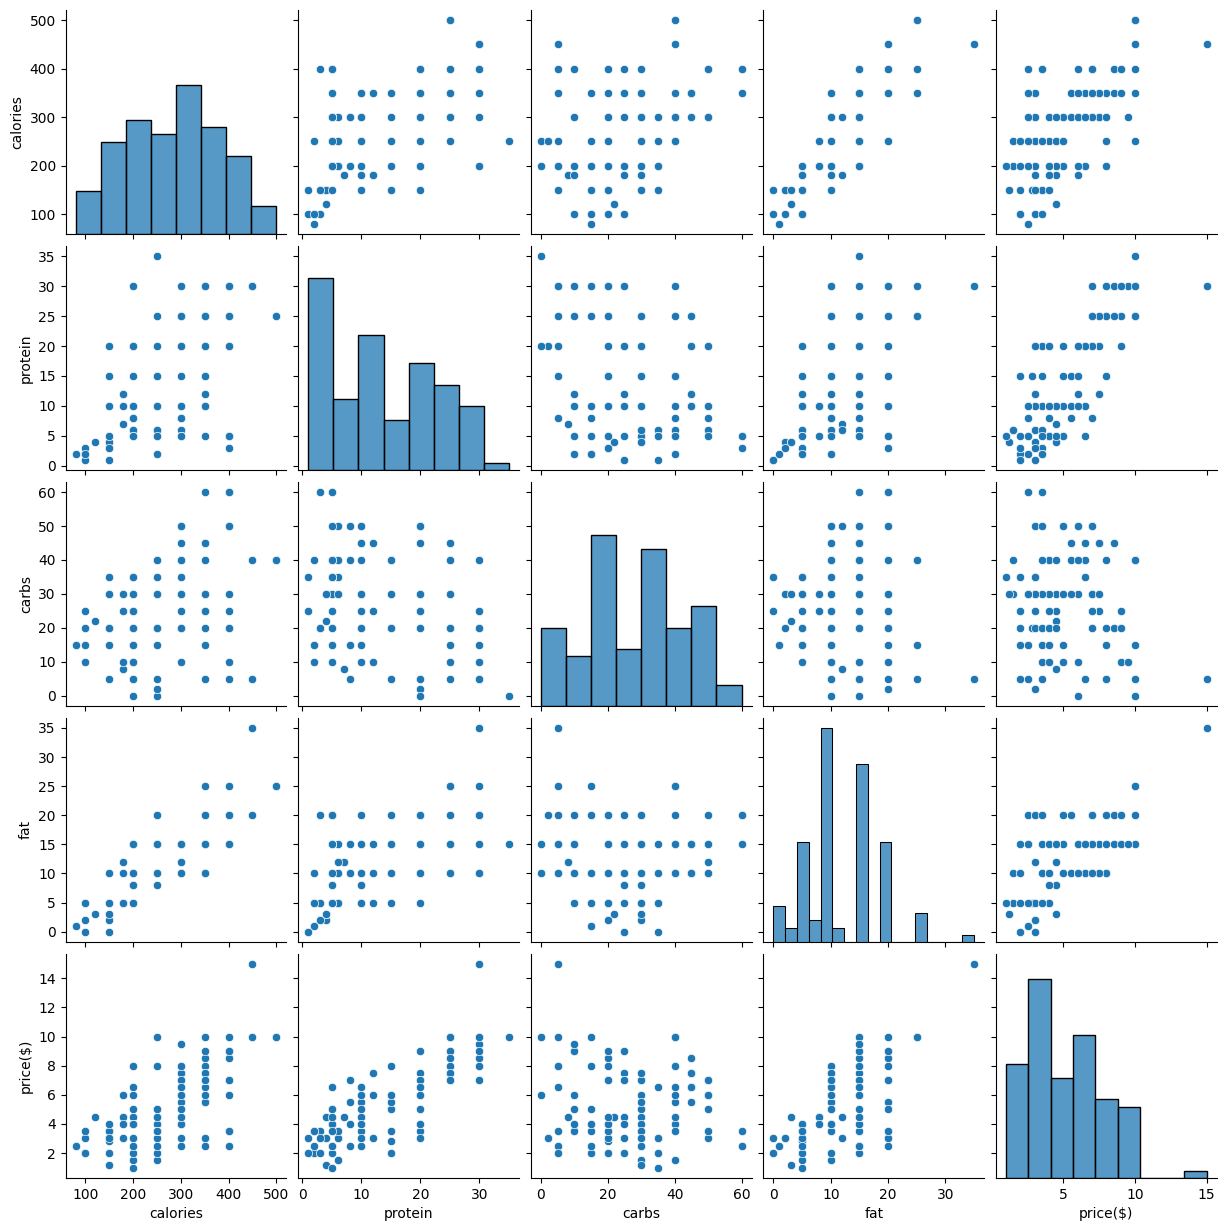

In [4]:
sns.pairplot(df[['calories', 'protein', 'carbs', 'fat', 'price($)']])



<Axes: >

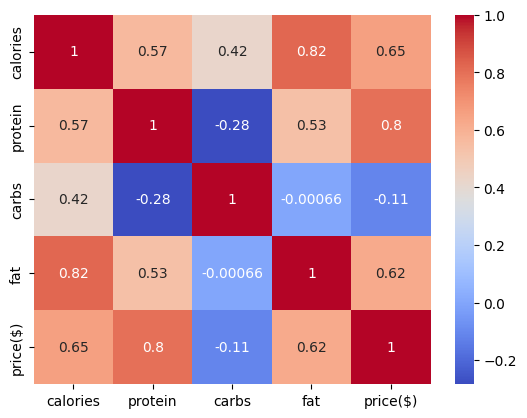

In [5]:
import numpy as np

#Correlation Matrix
sns.heatmap(df[['calories', 'protein', 'carbs', 'fat', 'price($)']].corr(), annot=True, cmap='coolwarm')




In [6]:
# Features for clustering
X = df[['calories', 'protein', 'carbs', 'fat', 'price($)']]



X.shape




(100, 5)

In [7]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





In [8]:
X_scaled


array([[-0.97670588, -0.74294932, -1.31262359, -0.03024117, -0.30374665],
       [ 0.29449483,  0.13239598,  0.86149416, -0.34856927,  1.05053778],
       [ 0.82416179,  0.67948679,  1.20120005,  0.44725098,  0.47013017],
       [ 1.35382875,  1.2265776 , -1.17674123,  1.24307123,  1.43747618],
       [-1.29450605, -1.07120381,  0.18208236, -1.62188167, -0.88415426],
       [ 0.29449483,  0.67948679, -0.15762354, -0.34856927,  0.85706857],
       [-0.76483909, -0.96178565, -0.49732943, -0.34856927, -0.49721585],
       [ 1.35382875, -0.96178565,  2.22031775,  1.24307123, -1.07762346],
       [ 1.88349571,  1.77366842,  0.86149416,  1.24307123,  1.82441459],
       [-0.76483909, -0.96178565, -1.17674123,  0.44725098, -0.11027745],
       [ 0.29449483, -0.41469484,  1.54090595, -0.34856927,  0.27666096],
       [ 0.82416179,  1.77366842, -1.51644713,  1.24307123,  1.05053778],
       [ 1.35382875,  0.67948679, -0.15762354,  1.24307123,  0.66359937],
       [-1.29450605, -1.18062198, -0.4

In [9]:


# Train a K-Means model
n_clusters = 4  # Number of clusters can be adjusted
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [10]:
# Save the model and scaler to .sav files
with open('kmeans_model11.sav', 'wb') as model_file:
    pickle.dump(kmeans, model_file)
with open('scaler_model11.sav', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully.")




Model and scaler saved successfully.
